In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:70% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지


# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#문제 1

In [61]:
df_first = pd.read_csv('C:/ai/source/01_python/data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding ='cp949')

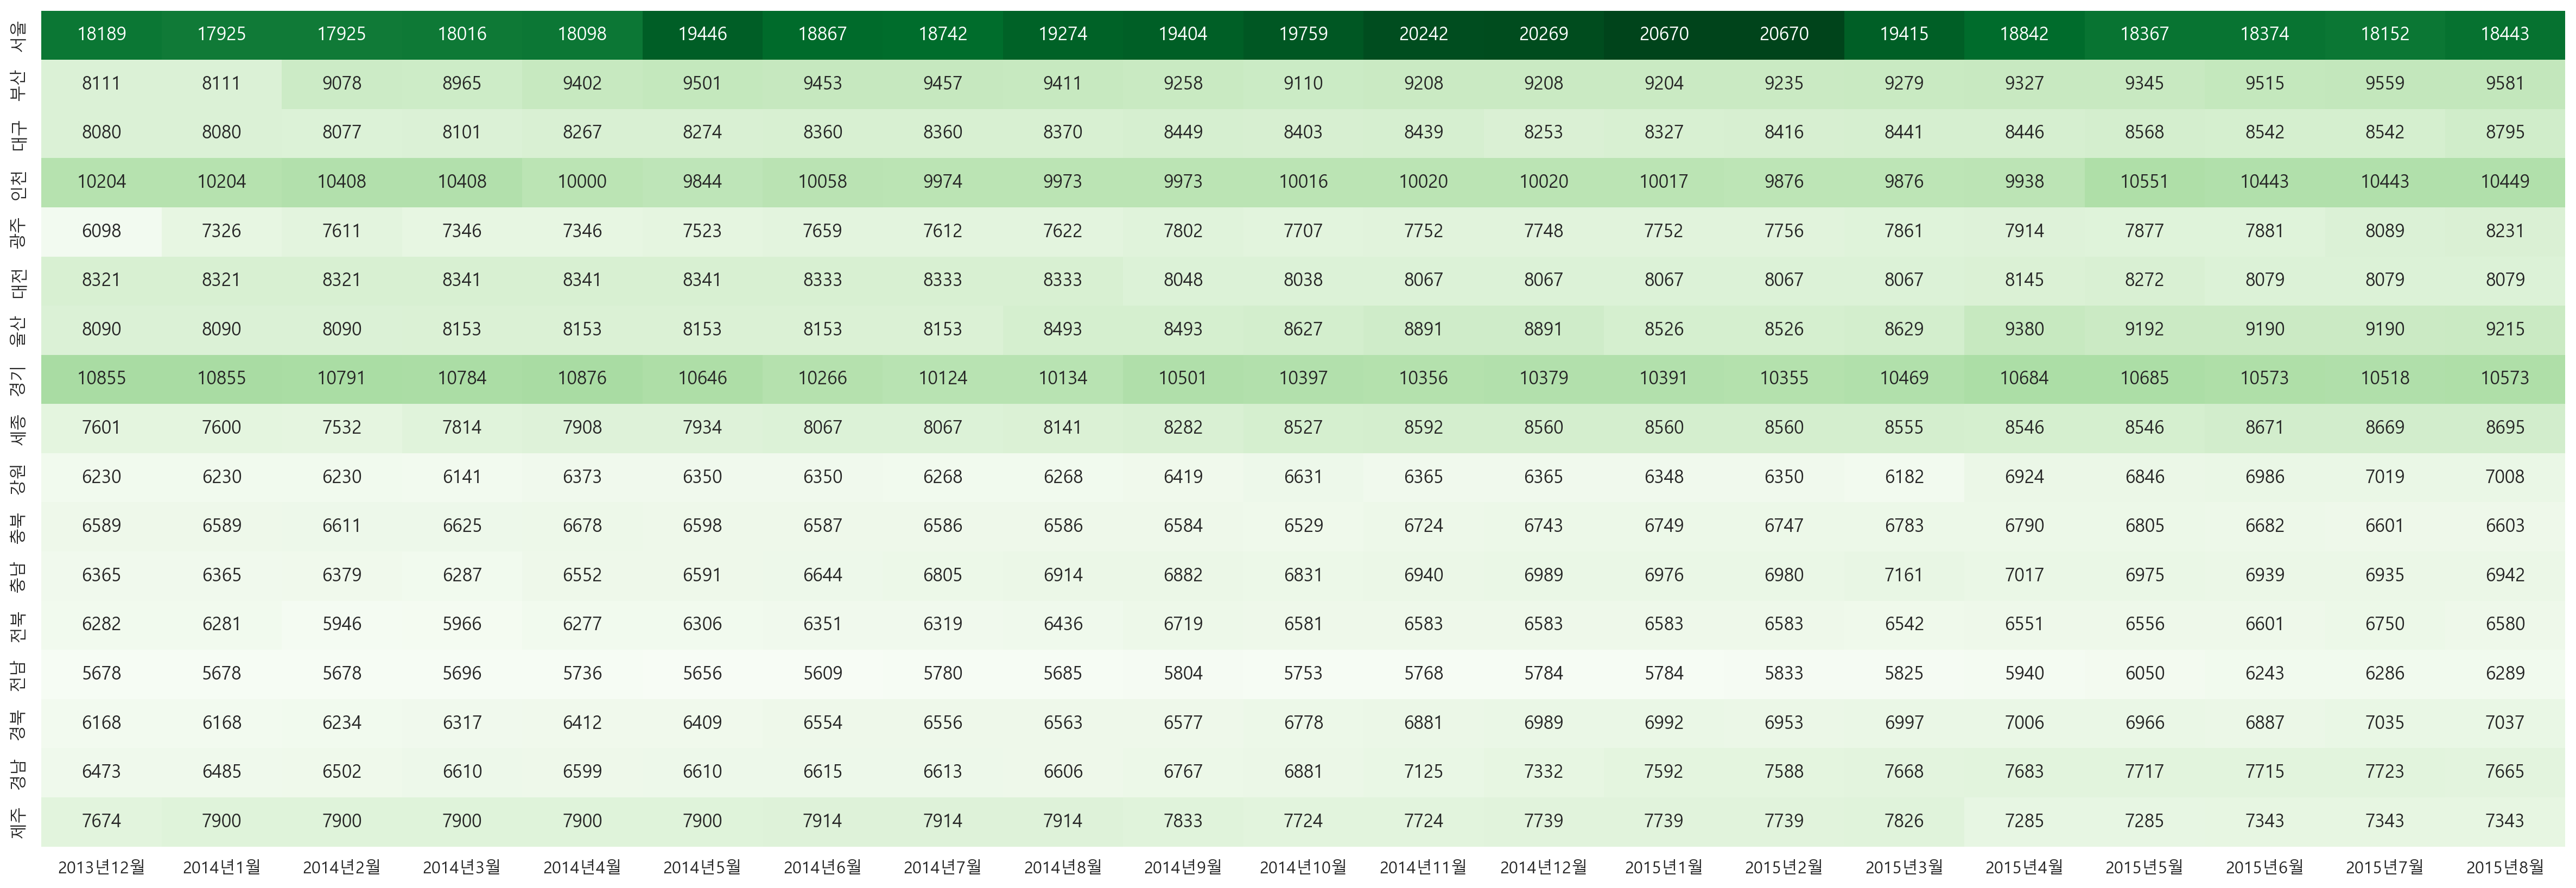

In [62]:
df_first_heat = df_first.set_index('지역')
df_first_heat.sample(1)


plt.figure(figsize=(30,10))
sns.heatmap(df_first_heat, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xticks(rotation=0)
plt.ylabel(None)
plt.show()

In [ ]:
#문제 2

In [124]:
df_last = pd.read_csv('C:/ai/source/01_python/data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                      encoding ='cp949')

In [143]:
import re

In [126]:
def commadrop(row):
    row = row.copy()
    price = row['분양가격(제곱미터)']
    # price(스칼라데이터)가 결측치인지 여부
        # (1) price is np.nan : 값의 타입에 상관없이 nan인지 여부
        # (2) pd.isna(price), pd.isnull(값) : 값의 타입에 상관없이 nan인지 여부
        # (3) np.isnan(숫자데이터): 값이 숫자가 아닐 경우 에러. 숫자일경우 nan인지 여부
    if price is np.nan:
        pass
    elif price.strip() == '': # space면 결측치로
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',') != -1: # 콤마(,)가 있으면 ,없애고 float형변환
        pricesplited = price.split(',')
        row['분양가격(제곱미터)'] = float(''.join(pricesplited))
    else:
        row['분양가격(제곱미터)'] = float(price) *3.3
    return row


df_last.apply(commadrop, axis=1)



,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,19400.7
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,24799.5
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [144]:
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('전용면적',''))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace('제곱미터','m²'))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace('초과','~'))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace('이하',''))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace(' ',''))

In [145]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),전용면적
0,서울,모든면적,2015,10,5841,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652,60m²
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,60m²~85m²
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,85m²~102m²
4,서울,전용면적 102제곱미터초과,2015,10,5879,102m²~


In [146]:
df_last.drop(['규모구분', '분양가격(제곱미터)'], axis=1, inplace=True) # 열제거
df_last

,지역명,연도,월,전용면적
0,서울,2015,10,모든면적
1,서울,2015,10,60m²
2,서울,2015,10,60m²~85m²
3,서울,2015,10,85m²~102m²
4,서울,2015,10,102m²~
...,...,...,...,...
9090,제주,2024,8,모든면적
9091,제주,2024,8,60m²
9092,제주,2024,8,60m²~85m²
9093,제주,2024,8,85m²~102m²


In [154]:
# df_last['분양가격(제곱미터)'] = \
#     pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',',''))

# df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3
# df_last.info()

In [156]:
# df_last.head()

In [94]:
#문제 3

df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().round(1)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.1,11060.9,8459.2,7464.2,7916.7,9018.9,8190.6,10377.4,20315.7,8765.0,9367.6,10976.0,6798.9,7110.4,7951.1,7689.9,6828.8
2016,7162.9,11685.0,8496.7,7753.4,9190.7,10282.0,8910.7,10743.5,21753.4,8857.8,9582.6,11099.1,6936.6,6906.6,9567.5,7958.2,7133.3
2017,7318.8,12296.2,8806.6,8288.1,9599.7,12192.0,9912.9,11637.6,21864.1,9132.9,10630.2,11672.4,7413.2,7406.1,12628.5,8157.3,7462.6
2018,8219.3,14258.4,9327.7,8680.8,9527.0,12139.3,10234.1,12890.0,23202.2,10340.5,10241.4,11881.5,7929.8,8174.6,11936.0,8201.8,8149.3
2019,8934.5,15665.5,10697.6,9050.2,12111.7,14081.6,12619.2,13537.9,28286.8,11299.4,10216.2,13249.8,8219.3,8532.3,11828.5,8748.8,7970.9
2020,10302.4,15106.1,10919.3,9997.7,13406.5,15314.2,11238.8,13353.0,29781.0,11628.1,12837.6,14983.0,9562.4,8559.4,14192.9,9139.4,8359.0
2021,10291.3,14567.1,11302.3,11227.2,13709.8,15586.3,11994.2,14317.7,29380.4,12578.1,14192.0,15774.3,9980.8,9047.9,22302.3,9860.7,8822.4
2022,11644.2,16621.6,12455.7,12018.0,15095.9,16821.9,14113.9,18166.8,29128.5,11310.0,17903.8,17341.8,10635.5,10003.1,18953.8,11730.3,10033.5
2023,13409.4,20175.2,13283.2,13025.3,17957.9,17656.7,17917.3,20470.9,33230.6,12278.2,18832.1,16150.7,11846.7,10966.0,24095.9,12580.6,11104.0


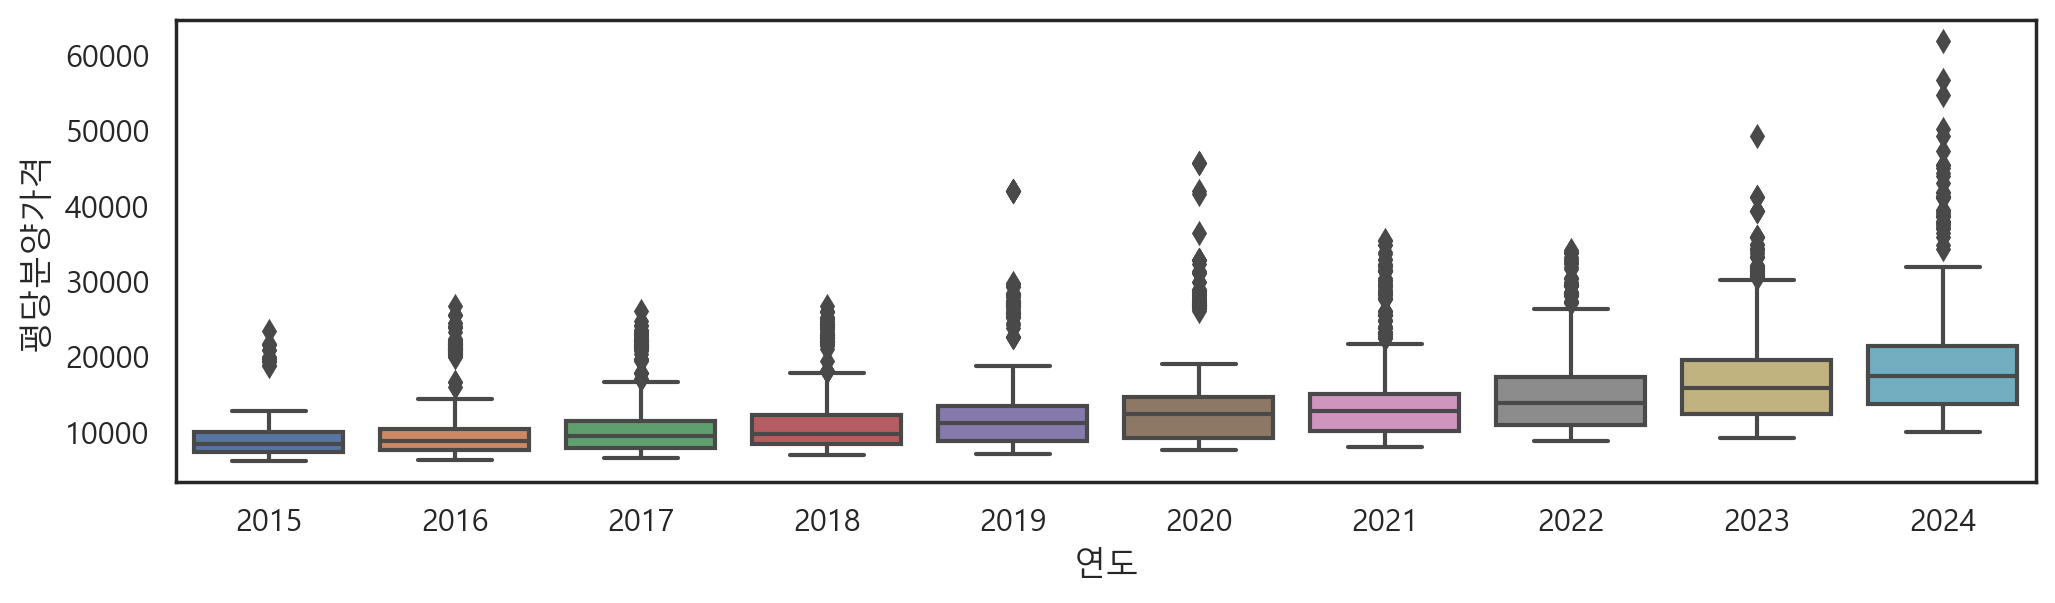

In [95]:
#문제 4
sns.boxplot(data=df_last, x='연도', y='평당분양가격')
plt.show()

In [31]:
#문제 5

In [102]:
new_first = df_first.melt(id_vars='지역', 
                          var_name='연도월', 
                          value_name='평당분양가격')
new_first.head(1)

,지역,연도월,평당분양가격
0,서울,2013년12월,18189


In [118]:
parse_year = lambda datestr : int(datestr.split('년')[0])
parse_year("2013년12월")

parse_month = lambda datestr : int(datestr.split('년')[-1][:-1])
parse_month("2013년12월")

12

In [140]:
# new_first['연도'] = new_first['연도월'].map(
#                             lambda datestr : int(datestr.split('년')[0])
#                     )
# new_first['월'] = new_first['연도월'].apply(
#                             lambda datestr : int(datestr.split('년')[-1][:-1])
#                     )


In [141]:
# new_first.drop('연도월', axis=1, inplace=True)
# new_first.head(1)

In [ ]:
new_first = new_first.rename(columns={'지역':'지역명'})
new_first.tail(1)

In [121]:
new_last = df_last[df_last['전용면적']=='모든면적']
new_last.drop('전용면적', axis=1, inplace=True)
new_last.sample()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
2985,경기,모든면적,2018,9,4094.0,13510.2


In [129]:
df = pd.concat([new_first, new_last]).reset_index(drop=True)
df.head(1)

,지역명,평당분양가격,연도,월,규모구분,분양가격(제곱미터)
0,서울,18189.0,2013,12,NaN,NaN


In [142]:
# new_last = df_last[df_last['전용면적']=='모든면적']
# new_last.drop('전용면적', axis=1, inplace=True)
# new_last.sample()

In [152]:
df = pd.concat([new_first, new_last]).reset_index(drop=True)
df_last.head()

,지역명,연도,월,전용면적
0,서울,2015,10,모든면적
1,서울,2015,10,60m²
2,서울,2015,10,60m²~85m²
3,서울,2015,10,85m²~102m²
4,서울,2015,10,102m²~
